In [1]:
%matplotlib inline
import wandb
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns

# Read data from wandb api or alternatively from text file

API key must be set up in command line using
$ wandb login

In [2]:
api = wandb.Api()
#nano = api.run("jer2ig/train/156sth06")
#nano = api.run("jer2ig/YOLOv5/3gyxq19k")
nano = api.run("jer2ig/train/35as015a")
small = api.run("jer2ig/train/1wb9ohfq")
medium = api.run("jer2ig/train/2t08fe4c")
large = api.run("jer2ig/train/2os54tl0")


# Plot data

C:\Users\Julius\AppData\Local\Temp/ipykernel_21332/1057491484.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


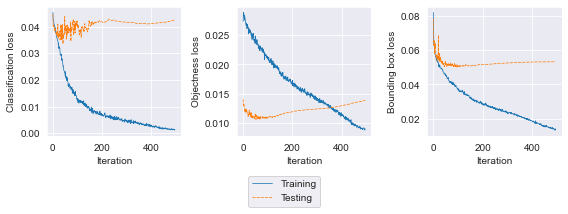

In [30]:
fig, ax = plt.subplots(1, 3,sharex= 'col', figsize=(8, 2.5))


sns.lineplot(data=runs.filter(regex="cls_loss"),legend=None, ax=ax[0], linewidth=.75)
ax[0].set_ylabel("Classification loss")
ax[0].set_xlabel("Iteration")
sns.lineplot(data=runs.filter(regex="obj_loss"),legend=None, ax=ax[1], linewidth=.75)
ax[1].set_ylabel("Objectness loss")
ax[1].set_xlabel("Iteration")
sns.lineplot(data=runs.filter(regex="box_loss"),legend=None, ax=ax[2], linewidth=.75)
ax[2].set_xlabel("Iteration")
ax[2].set_ylabel("Bounding box loss")

#fig.legend(labels=["yolo5n","yolo5m"],loc='lower center', bbox_to_anchor=(0.5, -0.05))
fig.tight_layout()
fig.legend(labels=["Training","Testing"],loc='lower center', bbox_to_anchor=(0.5, -0.2), bbox_transform=plt.gcf().transFigure)
fig.show()
#fig.subplots_adjust(bottom=0.2)
fig.savefig('baseb_loss.pdf', bbox_inches='tight')

C:\Users\Julius\AppData\Local\Temp/ipykernel_15040/3163831456.py:30: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


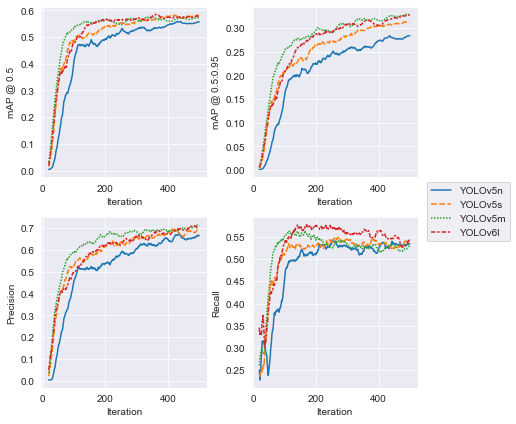

In [19]:
nano_hist = nano.history(x_axis="_step", pandas=(True), stream="default")
nano_hist = nano_hist.rename(columns=lambda c: "nano:"+str(c))
small_hist = small.history(x_axis="_step", pandas=(True), stream="default")
small_hist = small_hist.rename(columns=lambda c: "small:"+str(c))
medium_hist = medium.history(x_axis="_step", pandas=(True), stream="default")
medium_hist = medium_hist.rename(columns=lambda c: "medium:"+str(c))
large_hist = large.history(x_axis="_step", pandas=(True), stream="default")
large_hist = large_hist.rename(columns=lambda c: "large:"+str(c))

runs = pd.concat([nano_hist, small_hist, medium_hist, large_hist], axis=1)
#runs = nano_hist
#runs = runs.reindex(sorted(runs.columns), axis=1)
fig, ax = plt.subplots(2, 2, figsize=(6, 6))

sns.lineplot(data=runs.filter(regex="mAP_0.5$").rolling(20).mean(),legend=None, ax=ax[0,0])
ax[0,0].set_xlabel("Iteration")
ax[0,0].set_ylabel("mAP @ 0.5")
sns.lineplot(data=runs.filter(regex="mAP_0.5:0.95").rolling(20).mean(),legend=None, ax=ax[0,1])
ax[0,1].set_xlabel("Iteration")
ax[0,1].set_ylabel("mAP @ 0.5:0.95")
sns.lineplot(data=runs.filter(regex="precision").rolling(20).mean(),legend=None, ax=ax[1,0])
ax[1,0].set_xlabel("Iteration")
ax[1,0].set_ylabel("Precision")
sns.lineplot(data=runs.filter(regex="recall").rolling(20).mean(),legend=None, ax=ax[1,1])
ax[1,1].set_xlabel("Iteration")
ax[1,1].set_ylabel("Recall")

fig.tight_layout()
fig.legend(labels=["YOLOv5n","YOLOv5s", "YOLOv5m", "YOLOv6l"],loc='right', bbox_to_anchor=(1.2, 0.5), bbox_transform=plt.gcf().transFigure)
fig.show()
fig.savefig('size_perf.pdf', bbox_inches='tight')


C:\Users\Julius\AppData\Local\Temp/ipykernel_15040/1267532768.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


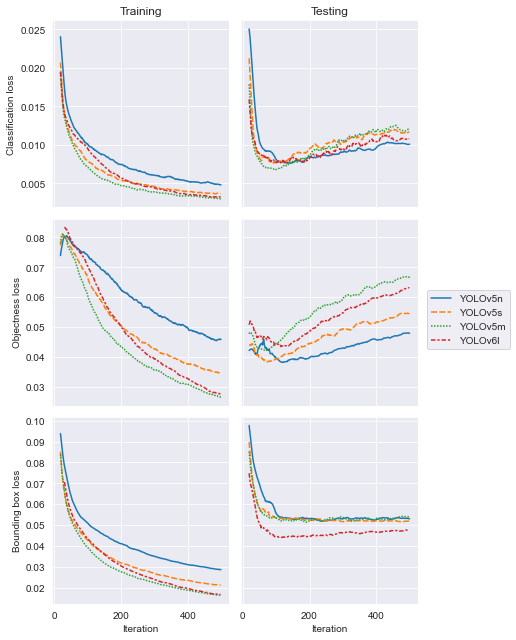

In [17]:
fig, ax = plt.subplots(3, 2,sharey='row',sharex= 'col', figsize=(6, 9))

ax[0,0].set_title("Training")
ax[0,1].set_title("Testing")

sns.lineplot(data=runs.filter(regex="train/cls_loss").rolling(20).mean(),legend=None, ax=ax[0,0])
ax[0,0].set_ylabel("Classification loss")
sns.lineplot(data=runs.filter(regex="train/obj_loss").rolling(20).mean(),legend=None, ax=ax[1,0])
ax[1,0].set_ylabel("Objectness loss")
sns.lineplot(data=runs.filter(regex="train/box_loss").rolling(20).mean(),legend=None, ax=ax[2,0])
ax[2,0].set_xlabel("Iteration")
ax[2,0].set_ylabel("Bounding box loss")
sns.lineplot(data=runs.filter(regex="val/cls_loss").rolling(20).mean(),legend=None, ax=ax[0,1])
sns.lineplot(data=runs.filter(regex="val/obj_loss").rolling(20).mean(),legend=None, ax=ax[1,1])
sns.lineplot(data=runs.filter(regex="val/box_loss").rolling(20).mean(),legend=None, ax=ax[2,1])
ax[2,1].set_xlabel("Iteration")

#fig.legend(labels=["yolo5n","yolo5m"],loc='lower center', bbox_to_anchor=(0.5, -0.05))
fig.tight_layout()
fig.legend(labels=["YOLOv5n","YOLOv5s", "YOLOv5m", "YOLOv6l"],loc='right', bbox_to_anchor=(1.2, 0.5), bbox_transform=plt.gcf().transFigure)
fig.show()
#fig.subplots_adjust(bottom=0.2)
fig.savefig('size_loss.pdf', bbox_inches='tight')

In [18]:
runs.filter(regex="val/box_loss").columns

Index(['nano:val/box_loss', 'small:val/box_loss', 'medium:val/box_loss',
       'large:val/box_loss'],
      dtype='object')